In [1]:
%matplotlib inline
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set(font='Noto Sans CJK TC')
mpl.style.use('ggplot')  # must put after sns.set

In [2]:
from scipy.stats import pearsonr
import statsmodels.api as sm

/Users/mosky/.local/share/virtualenvs/data-science-with-python-JMAT8Joy/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


# Outliners

In [3]:
# ref: http://www.statsmodels.org/stable/datasets/generated/star98.html
star98_df = sm.datasets.star98.load_pandas().data

## Before

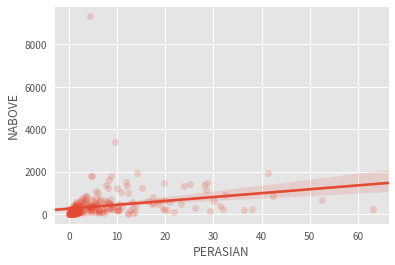

In [4]:
sns.regplot(
    data=star98_df, x='PERASIAN', y='NABOVE',
    scatter_kws={'alpha': 0.2}
)

In [5]:
pearsonr(star98_df.PERASIAN, star98_df.NABOVE)

(0.24430018019697813, 1.7059340444264353e-05)

## After

In [6]:
d = star98_df
display(d.shape)

m = d.mean()
s = d.std()
d = d[(d > m-s*2) & (d < m+s*2)].dropna()
display(d.shape)

star98_df_2 = d

(303, 22)

(184, 22)

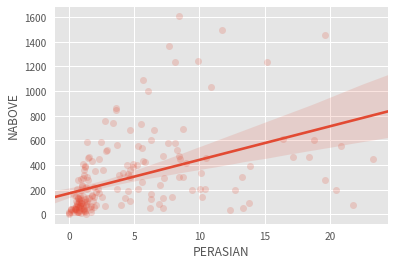

In [7]:
sns.regplot(data=star98_df_2, x='PERASIAN', y='NABOVE', scatter_kws={'alpha': 0.2})

In [8]:
pearsonr(star98_df_2.PERASIAN, star98_df_2.NABOVE)

(0.4428452353418128, 3.0807917473345809e-10)

## The Ranges

* $ IQR $: 25–75%.
* $ 2 \sigma $: 2.3–97.7%.
* $ 3 \sigma $: 0.1–99.9%.

## Dig More

* [Scaling data with outliers – Scikit-Learn](http://scikit-learn.org/stable/modules/preprocessing.html#scaling-data-with-outliers)